In [91]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
%matplotlib notebook

In [92]:
def func_1(f_1,t):
    return np.cos(2*math.pi*f_1*t)
def func_2(f_2,t):
    return np.cos(2*math.pi*f_2*t + np.pi/8)
def func_3(a,t):
    return a*func_1(f_1,t)*func_2(f_2,t)

In [99]:
num_of_samp = 1024
samp_rate = 2703
#t = [*range(0,num_of_samp/samp_rate,num_of_samp)]
t = np.linspace(0,num_of_samp/samp_rate,num_of_samp)
f_1 = 199
f_2 = 56

<IPython.core.display.Javascript object>


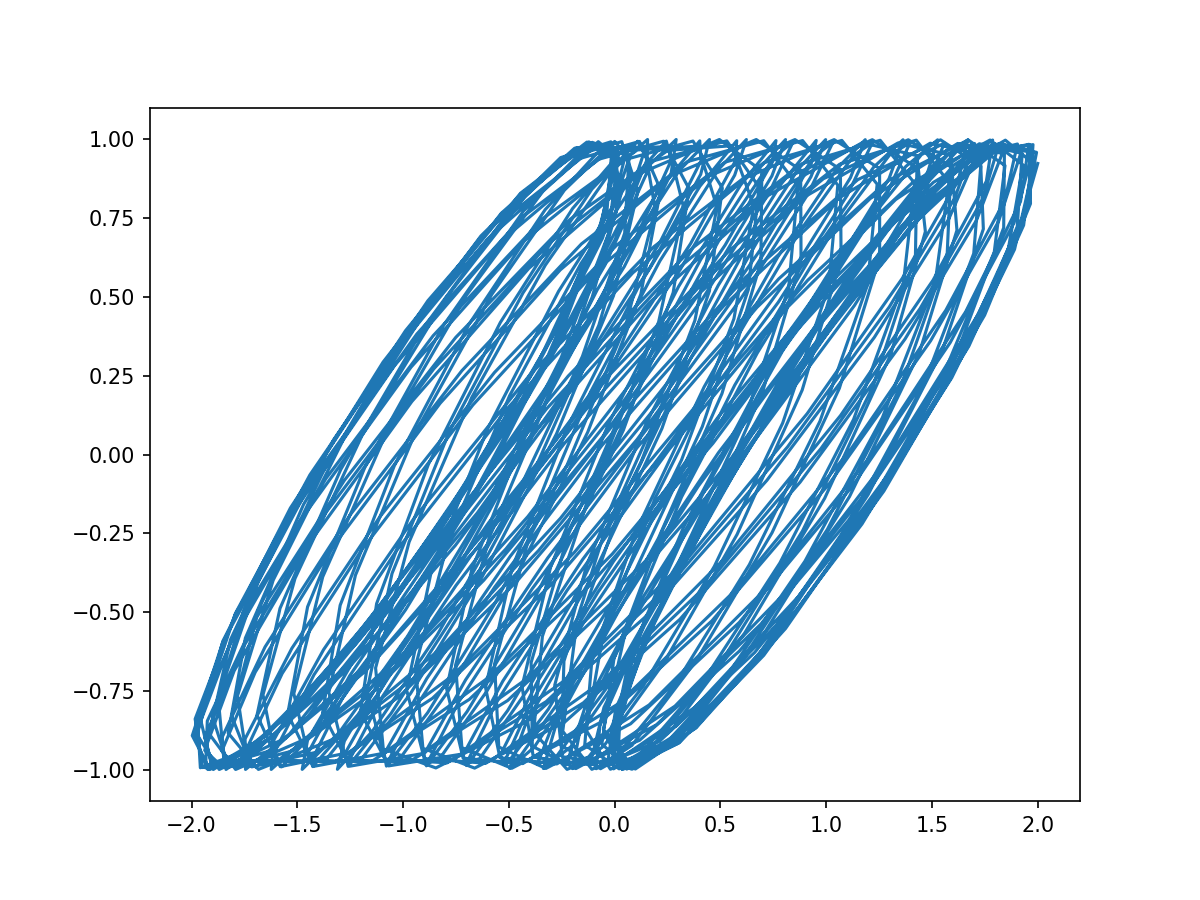

In [101]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
#plt.plot(t,func_1(f_1,t))
plt.plot(func_1(f_1,t)+func_1(f_2,t)+func_3(0,t),func_2(f_1,t))
#plt.xlim(0,.05)
#cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
plt.show()

<IPython.core.display.Javascript object>


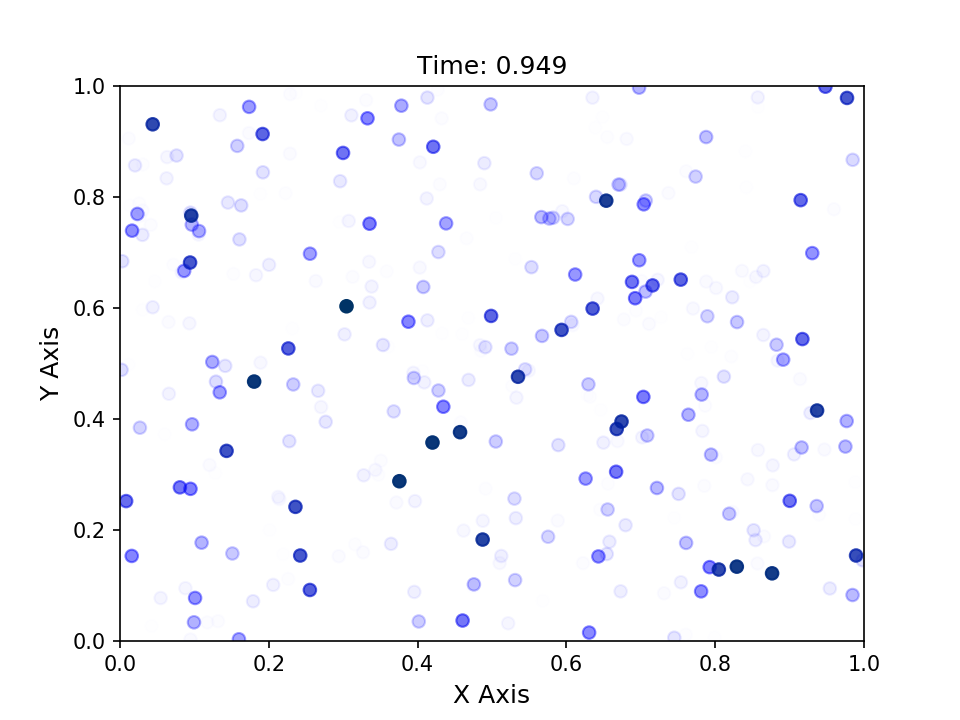

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots()
ax.set_xlabel('X Axis', size = 12)
ax.set_ylabel('Y Axis', size = 12)
ax.axis([0,1,0,1])
x_vals = []
y_vals = []
intensity = []
iterations = 100

t_vals = np.linspace(0,1, iterations)

colors = [[0,0,1,0],[0,0,1,0.5],[0,0.2,0.4,1]]
cmap = LinearSegmentedColormap.from_list("", colors)
scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

def get_new_vals():
    n = np.random.randint(1,5)
    x = np.random.rand(n)
    y = np.random.rand(n)
    return list(x), list(y)

def update(t):
    global x_vals, y_vals, intensity
    # Get intermediate points
    new_xvals, new_yvals = get_new_vals()
    x_vals.extend(new_xvals)
    y_vals.extend(new_yvals)

    # Put new values in your plot
    scatter.set_offsets(np.c_[x_vals,y_vals])

    #calculate new color values
    intensity = np.concatenate((np.array(intensity)*0.96, np.ones(len(new_xvals))))
    scatter.set_array(intensity)

    # Set title
    ax.set_title('Time: %0.3f' %t)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=t_vals,interval=50)
cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
plt.show()

<IPython.core.display.Javascript object>


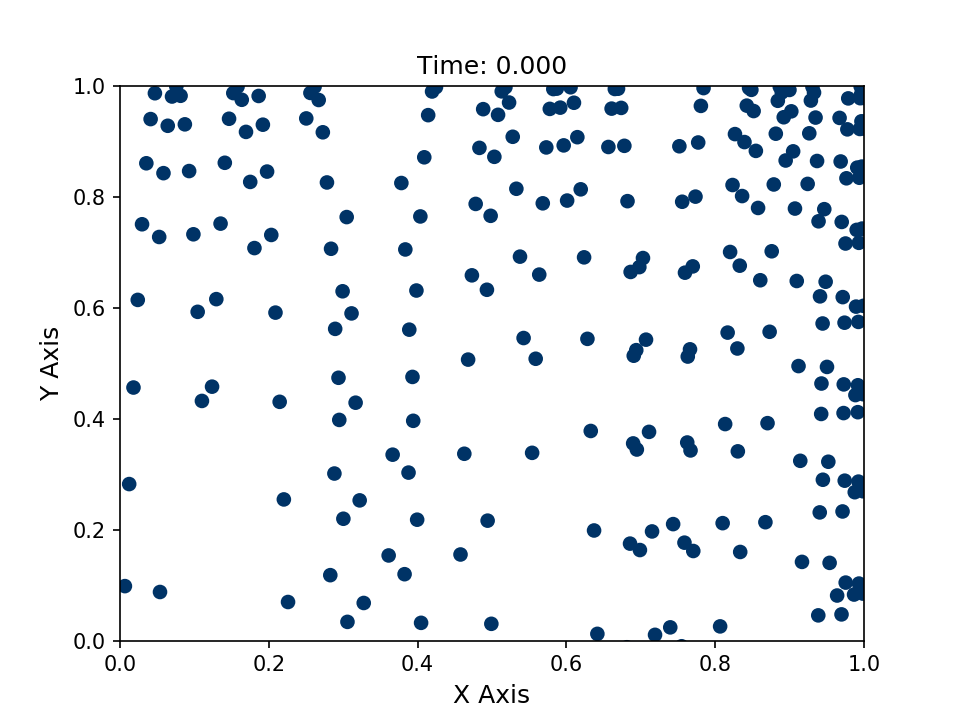

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots()
ax.set_xlabel('X Axis', size = 12)
ax.set_ylabel('Y Axis', size = 12)
ax.axis([0,1,0,1])
x_vals = []
y_vals = []
intensity = []
iterations = 100

t_vals = t

colors = [[0,0,1,0],[0,0,1,0.5],[0,0.2,0.4,1]]
cmap = LinearSegmentedColormap.from_list("", colors)
scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)

def get_new_vals():
    n = np.random.randint(1,5)
    x = func_1(f_1,t)
    y = func_2(f_2,t)
    return list(x), list(y)

def update(t):
    global x_vals, y_vals, intensity
    # Get intermediate points
    new_xvals, new_yvals = get_new_vals()
    x_vals.extend(new_xvals)
    y_vals.extend(new_yvals)

    # Put new values in your plot
    scatter.set_offsets(np.c_[x_vals,y_vals])

    #calculate new color values
    intensity = np.concatenate((np.array(intensity)*0.96, np.ones(len(new_xvals))))
    scatter.set_array(intensity)

    # Set title
    ax.set_title('Time: %0.3f' %t)

ani = matplotlib.animation.FuncAnimation(fig, update, frames=t_vals,interval=50)

plt.show()